# Credit Card Fraud Detection

## 簡世育 Allen CHien 

# Description of Data 

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

# Aim

建立信用卡詐欺預測模型，以防止未來信用卡使用者再次受害。

# Contents

- [Import package and loading data](#Import-package-and-loading-data)
- [Deal with imbalanced training labels](#Deal-with-imbalanced-training-labels)
- [Model select](#Model-select)
- [ROC curve](#ROC-curve)

# Import package and loading data

In [1]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set( font_scale=1.5)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

C:\Users\hahohy889\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\hahohy889\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def model(model,features_test,labels_test):
    '''建立confusion matrix心熱圖'''
    pred=model.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    
    print('the recall for this model is :',cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(8,6))
    print('TP: ',cnf_matrix[1,1]) 
    print('TN: ',cnf_matrix[0,0])  
    print('FP: ',cnf_matrix[0,1]) 
    print('FN: ',cnf_matrix[1,0])  
    
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidths=0.5)
    plt.title('Confusion_matrix')
    plt.xlabel('Predicted_class')
    plt.ylabel('Real class')
    plt.show()
    
    print('--------------Classification Report----------------------')
    print(classification_report(labels_test,pred))
    

def Model2Roc(model, features_test, labels_test, color, method_name):
    '''建立ROC曲線'''
    probas_= model.predict_proba(features_test)
    fpr, tpr, thresholds = roc_curve(labels_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color = color, label = method_name)

In [3]:
df = pd.read_csv('creditcard.csv')
print('The shape of df :', df.shape)

The shape of df : (284807, 31)


共有284807個觀測值，與31個變數

In [4]:
pd.set_option('display.max_columns', 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

由上表可觀察到，Time為時間變數，代表第一比較交易開始計算的經過秒數。而預測變數共有有V1、V2、...v28以及Amount，為了保護客戶以及個資法問題，V1至V29等該變數之意義是不明的。其中目標變數Class代表的意義為進行該筆交易受詐欺之有無，以1與0表示。

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


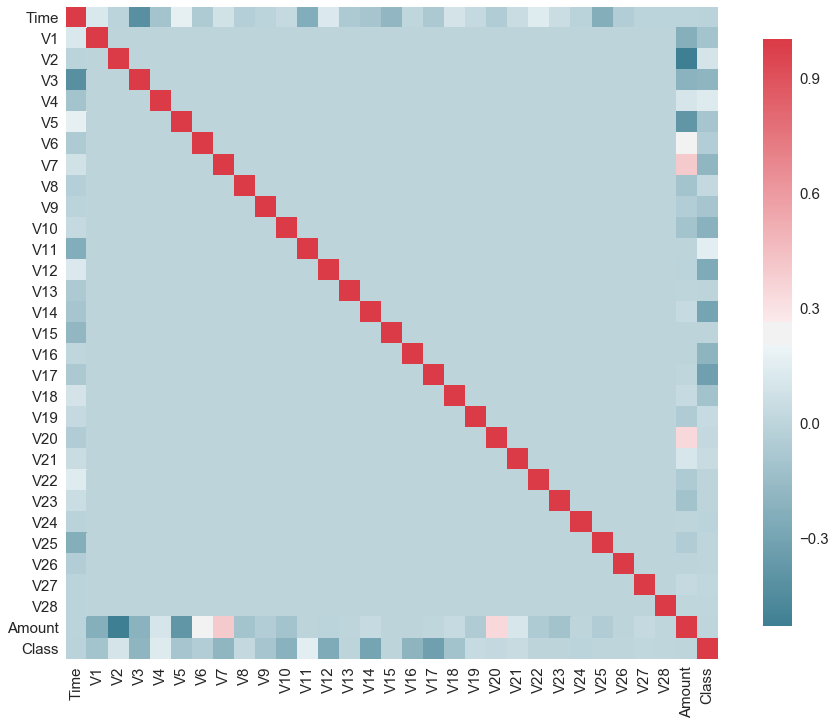

In [37]:
corr = df.corr()
_ , ax = plt.subplots( figsize =( 16 , 12 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot_kws = { 'fontsize' : 12 })

大部分的**預測變數間**為**無相關**

In [43]:
pd.DataFrame(df.corr().iloc[-1,]).T

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Class,-0.01,-0.10,0.09,-0.19,0.13,-0.09,-0.04,-0.19,0.02,-0.10,-0.22,0.15,-0.26,-0.00,-0.30,-0.00,-0.20,-0.33,-0.11,0.03,0.02,0.04,0.00,-0.00,-0.01,0.00,0.00,0.02,0.01,0.01,1.00


而**預測變數與目標變數**也大多為**無相關與低度相關**

# Deal with imbalanced training labels

In [46]:
print('Class為1的次數', df.loc[df['Class']==1].shape[0], 'Class為1所佔的比例:{}%'.format(df.loc[df['Class']==1].shape[0]/df.shape[0]*100))
print('Class為0的次數', df.loc[df['Class']==0].shape[0], 'Class為1所佔的比例:{}%'.format(df.loc[df['Class']==0].shape[0]/df.shape[0]*100))

Class為1的次數 492 Class為1所佔的比例:0.1727485630620034%
Class為0的次數 284315 Class為1所佔的比例:99.82725143693798%


由上述資訊可知，共有284807筆交易資料，其中受到詐欺之交易比數為492筆，共佔總交易資料中是0.1727%。 
代表資料存在嚴重的偏倚，真正影響的結果的只佔很少比例。
**如果資料存在這種不平衡，分析得出的結論也一定是有偏的，
往往分類結果會偏向於較多觀測的類。**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

In [12]:
print('The shape of X :', X.shape, 'The shape of y :', y.shape)

The shape of X : (284807, 29) The shape of y : (284807,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=889)

In [14]:
print("The shape of X_train: ", X_train.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of X_test : ", X_test.shape)
print("The shape of y_test : ", y_test.shape)

The shape of X_train:  (199364, 29)
The shape of y_train:  (199364,)
The shape of X_test :  (85443, 29)
The shape of y_test :  (85443,)


**為了解決非平衡之資料，本次分析採取的處理方法為SMOTE(Synthetic Minority Oversampling Technique)**， 想法為合成稀有事件採樣技術。 使用該方法後，最後分析的樣本數為7872筆資料，並且成功的將受詐欺之有無分類為是當的比率。 在做機器學習演算法時，需要把資料分成training set和validation set這兩個資料組。 此處是將各筆資料採隨機分派至兩組，且是將預測項按事先設定好之比率進行切割。處理過程如下。

In [15]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE, The shape of X_train: ", X_train.shape)
print("Before SMOTE, The shape of y_train: ", y_train.shape)

print("Before SMOTE, the number of Class is 1: {}".format(sum(y_train==1)))
print("Before SMOTE, the number of Class is 0: {}".format(sum(y_train==0)))

sm = SMOTE(random_state=889)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)
print('-'*89)
print('After OverSampling, The shape of X_train_smote: {}'.format(X_train_smote.shape))
print('After OverSampling, The shape of y_train_smote: {}'.format(y_train_smote.shape))

print("After OverSampling, the number of Class is 1: {}".format(sum(y_train_smote==1)))
print("After OverSampling, the number of Class is 0: {}".format(sum(y_train_smote==0)))

Before SMOTE, The shape of X_train:  (199364, 29)
Before SMOTE, The shape of y_train:  (199364,)
Before SMOTE, the number of Class is 1: 359
Before SMOTE, the number of Class is 0: 199005
-----------------------------------------------------------------------------------------
After OverSampling, The shape of X_train_smote: (398010, 29)
After OverSampling, The shape of y_train_smote: (398010,)
After OverSampling, the number of Class is 1: 199005
After OverSampling, the number of Class is 0: 199005


# Model select

## Logistic Regression

the recall for this model is : 0.9022556390977443
TP:  120
TN:  83700
FP:  1610
FN:  13


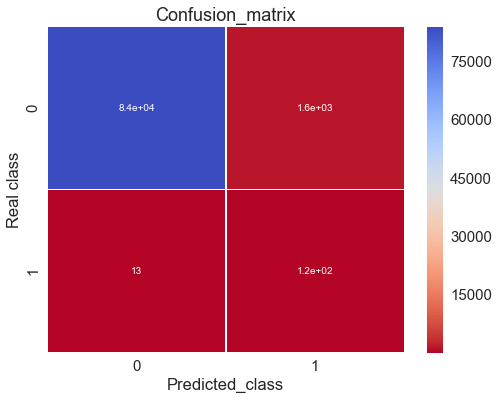

--------------Classification Report----------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85310
          1       0.07      0.90      0.13       133

avg / total       1.00      0.98      0.99     85443



In [16]:
lgr = LogisticRegression()
lgr.fit(X_train_smote, y_train_smote)
model(lgr, X_test, y_test)

## K-Nearest Neighbors

the recall for this model is : 0.8270676691729323
TP:  110
TN:  85044
FP:  266
FN:  23


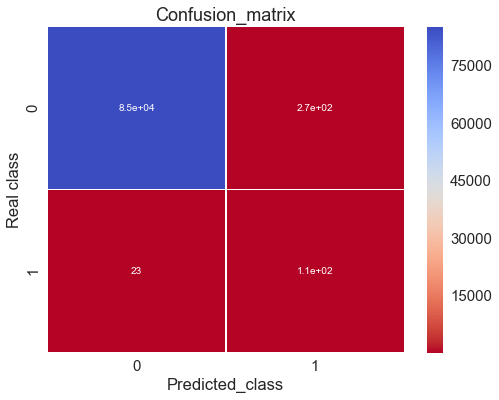

--------------Classification Report----------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85310
          1       0.29      0.83      0.43       133

avg / total       1.00      1.00      1.00     85443



In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)
model(knn, X_test, y_test)

## Decision Tree

the recall for this model is : 0.7819548872180451
TP:  104
TN:  85141
FP:  169
FN:  29


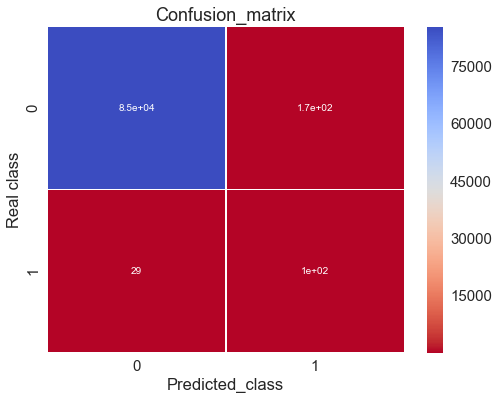

--------------Classification Report----------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85310
          1       0.38      0.78      0.51       133

avg / total       1.00      1.00      1.00     85443



In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
model(dt, X_test, y_test)

## Naive Bayes

the recall for this model is : 0.8721804511278195
TP:  116
TN:  83025
FP:  2285
FN:  17


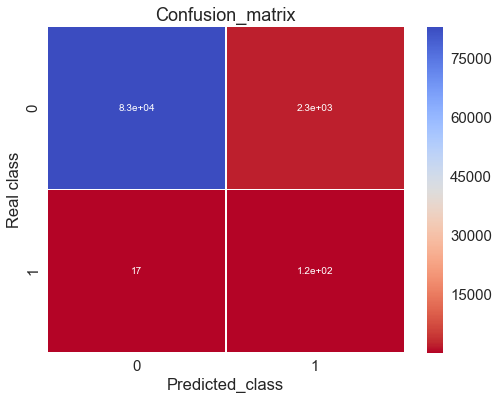

--------------Classification Report----------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85310
          1       0.05      0.87      0.09       133

avg / total       1.00      0.97      0.98     85443



In [19]:
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)
model(gnb, X_test,  y_test)

## Random Forest

the recall for this model is : 0.7894736842105263
TP:  105
TN:  85297
FP:  13
FN:  28


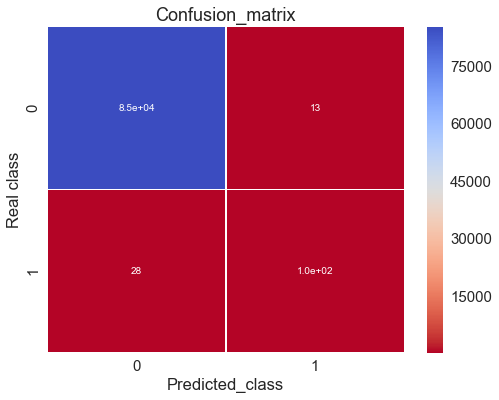

--------------Classification Report----------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85310
          1       0.89      0.79      0.84       133

avg / total       1.00      1.00      1.00     85443



In [20]:
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
model(rf, X_test, y_test)

## ROC curve

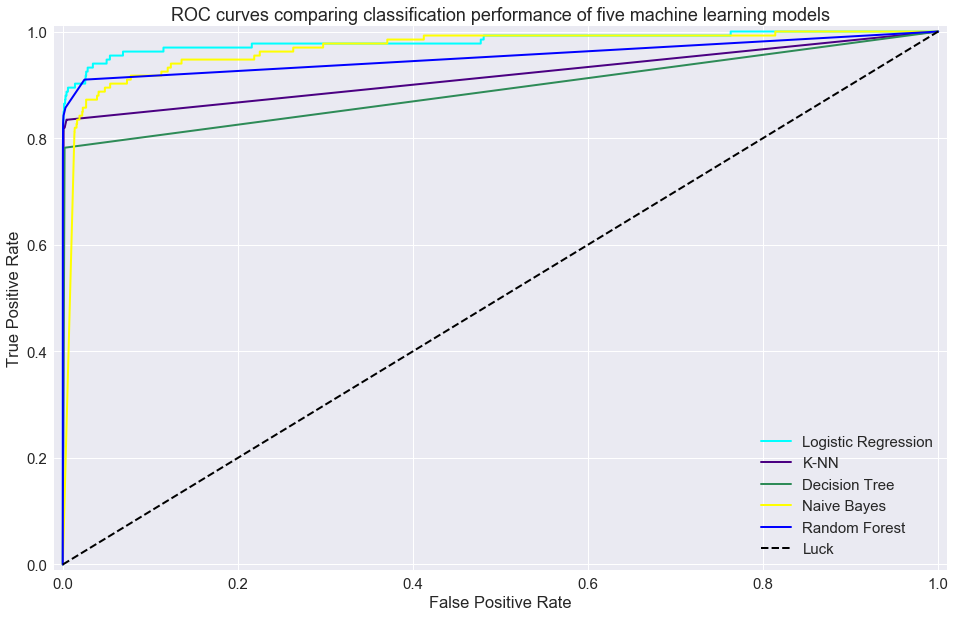

In [21]:
plt.figure(figsize=(16,10))
Model2Roc(lgr, X_test, y_test, 'cyan', 'Logistic Regression')

Model2Roc(knn, X_test, y_test, 'indigo', 'K-NN')

Model2Roc(dt, X_test, y_test, 'seagreen', 'Decision Tree')

Model2Roc(gnb, X_test, y_test, 'yellow', 'Naive Bayes')

Model2Roc(rf, X_test, y_test, 'blue', 'Random Forest')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves comparing classification performance of five machine learning models')
plt.legend(loc="lower right", fontsize=15)